In [1]:

# coding: utf-8

# In[346]:


import numpy as np
import math
from array import array
import sys
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [2]:
import Lagrangian_Learning_Functions

2


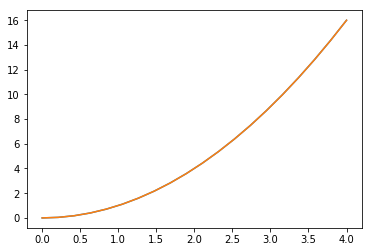

In [6]:

# In[476]:


## Two mode optimizer
#function [Suggested_Parameter_Samples_From_Two_Mode,ImprovementItteration] = Two_Mode_Optimizer(InitialParameters,NumberOfSamples,Parameter_ChangeVector,Cost_Change,ImprovementItteration,TargetedSearchDecayRate,RandomSearchGrowthRate,TargetedMultiplicationFactor,RandomMultiplicationFactor,SignificantChangeValue)
import numpy as np
import matplotlib.pyplot as plt

def Two_Mode_Optimizer(InitialParameters,NumberOfSamples,Parameter_ChangeVector,Cost_Change,ImprovementItteration,TargetedSearchDecayRate,RandomSearchGrowthRate,TargetedMultiplicationFactor,RandomMultiplicationFactor,SignificantChangeValue,Maximal_Random_Search):

# function [Suggested_Parameter_Samples_From_Two_Mode,ImprovementItteration] = Two_Mode_Optimizer(InitialParameters,NumberOfSamples,Parameter_ChangeVector,Cost_Change,ImprovementItteration,TargetedSearchDecayRate,RandomSearchGrowthRate,TargetedMultiplicationFactor,RandomMultiplicationFactor,SignificantChangeValue)


    Vectorized_Implimentation = 0
    For_Loop_Implimentation = 1
    TargetedSearch = np.zeros((len(InitialParameters),NumberOfSamples))
    if sum(abs(Parameter_ChangeVector)) > SignificantChangeValue:
        ImprovementItteration = 1


    if Vectorized_Implimentation == 1:
        TargetedSearch = exp(-(ImprovementItteration-1)/TargetedSearchDecayRate)*diag(TargetedMultiplicationFactor*(-Cost_Change)*Parameter_ChangeVector)*ones(length(InitialParameters),NumberOfSamples)*diag(rand(NumberOfSamples,1))
        RandomSearch = exp((ImprovementItteration-1)*RandomSearchGrowthRate)*RandomMultiplicationFactor*(rand(length(InitialParameters),NumberOfSamples)-0.5)


    if For_Loop_Implimentation == 1:
        RandomNumbers = np.random.rand(NumberOfSamples,1)
        
        TargetedSearch_Amplitude = RandomNumbers*np.exp(-(ImprovementItteration-1)/TargetedSearchDecayRate)         *TargetedMultiplicationFactor*(-Cost_Change)

        for sample in range (1,NumberOfSamples):

            TargetedSearch[:,sample] = TargetedSearch_Amplitude[sample]*Parameter_ChangeVector[:,0]

        
        RandomSearch = min(np.exp((ImprovementItteration-1)*RandomSearchGrowthRate)*RandomMultiplicationFactor,Maximal_Random_Search)         *(np.random.rand(len(InitialParameters),NumberOfSamples)-0.5)
        
    
        if min(np.exp((ImprovementItteration-1)*RandomSearchGrowthRate)*RandomMultiplicationFactor,Maximal_Random_Search) == Maximal_Random_Search:
            RandomSearch = np.sin((ImprovementItteration-1)*2*RandomSearchGrowthRate + np.pi/2)*0.1             *(np.random.rand(len(InitialParameters),NumberOfSamples)-0.5)

#     print(RandomSearch)
    Suggested_Parameter_Samples_From_Two_Mode = InitialParameters + TargetedSearch + RandomSearch
    Suggested_Parameter_Samples_From_Two_Mode[:,1] = InitialParameters[:,0]

    ImprovementItteration = ImprovementItteration +1;


    return Suggested_Parameter_Samples_From_Two_Mode,ImprovementItteration




def Optimize_With_Two_Mode_Algorithm(x,y,InitialParameters,Cost1,NumberOfSamples,ImprovementItteration,TargetedSearchDecayRate,RandomSearchGrowthRate,TargetedMultiplicationFactor ,RandomMultiplicationFactor,SignificantChangeValue,Maximal_Random_Search,print_Cost,Number_Of_Itterations):
    
    Parameter_ChangeVector = np.zeros((len(InitialParameters),1))
    Cost_Change = 0
    
    PreviousCost = Cost1.Cost_Function(y,InitialParameters)
#     PreviousCost = np.sum((InitialParameters-y)**2)
    Best_Individual = InitialParameters

    for i in range(0,Number_Of_Itterations):
        Suggested_Parameter_Samples_From_Two_Mode,ImprovementItteration = Two_Mode_Optimizer(Best_Individual,NumberOfSamples,Parameter_ChangeVector,Cost_Change,ImprovementItteration,TargetedSearchDecayRate,RandomSearchGrowthRate,TargetedMultiplicationFactor,RandomMultiplicationFactor,SignificantChangeValue,Maximal_Random_Search)

#         Cost = np.sum((Suggested_Parameter_Samples_From_Two_Mode-y)**2,0)
        Cost    = Cost1.Cost_Function(y,Suggested_Parameter_Samples_From_Two_Mode)
        index_min = np.argmin(Cost)
        CurrentCost = Cost[index_min ]

        Cost_Change = CurrentCost - PreviousCost
        Parameter_ChangeVector = np.array([Suggested_Parameter_Samples_From_Two_Mode[:,index_min]]).T - Best_Individual
        Best_Individual = np.array([Suggested_Parameter_Samples_From_Two_Mode[:,index_min]]).T

        PreviousCost = CurrentCost
        if print_Cost == 1:
            print(CurrentCost)
    
    return Best_Individual



## Defining Cost Function
class Cost_Function:
    def Cost_Function(self,Y,Individuals): 
        
        ## This should be a cost function to be minimized
        ## This should output the cost / negative fittness - for each of the individuals

        Cost_Function1 = np.sum((Y - Individuals)**2,0)

        return Cost_Function1
    
    
    
    ## Two mode test
InitialParameters = np.random.rand(20,1)
x = np.array([np.linspace(0,4,20)]).T
y = x**2
Cost1 = Cost_Function()
Number_Of_Itterations = 1000

NumberOfSamples = 10
## Setting the hyperparameters for two mode
ImprovementItteration = 1
TargetedSearchDecayRate = 1
RandomSearchGrowthRate = 0.1
TargetedMultiplicationFactor = 100
RandomMultiplicationFactor = 100
SignificantChangeValue = 0.2
Maximal_Random_Search = 0.5

print_Cost = 0
Best_Individual = Optimize_With_Two_Mode_Algorithm(x,y,InitialParameters,Cost1,NumberOfSamples,ImprovementItteration,TargetedSearchDecayRate,RandomSearchGrowthRate,TargetedMultiplicationFactor ,RandomMultiplicationFactor,SignificantChangeValue,Maximal_Random_Search,print_Cost,Number_Of_Itterations)

plt.plot(x,y)
plt.plot(x,Best_Individual)
